In [43]:
import pickle as pk
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/BankChurners.csv")

data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [3]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape


scaled_x_train.shape

(7675, 32)

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [46]:
X=scaled_x_train
from sklearn import mixture

In [9]:
gmm = mixture.GaussianMixture(n_components=5,
                                      covariance_type='diag')
gmmData=gmm.fit(X)



df=pd.DataFrame(columns=X_train_res.columns)
df.shape

df=pd.DataFrame(scaled_x_train)
df.columns=X_train_res.columns



#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
# df['k_means']
=gmmData.predict_proba(X)
# df['target']=y_train_res
# print(df.shape)

In [47]:
Xvalid=gmm.predict_proba(scaled_x_valid)

In [48]:
Xvalid

array([[1.00000000e+00, 0.00000000e+00, 3.16147350e-16, 0.00000000e+00,
        4.79056587e-36],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.67792316e-23],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.79222636e-24],
       [1.00000000e+00, 0.00000000e+00, 4.52297816e-14, 0.00000000e+00,
        8.91451607e-37]])

In [49]:
XValidclusters=gmm.predict(scaled_x_valid)
XValidclusters

array([0, 1, 0, ..., 3, 2, 0])

In [50]:
XValidclusters=pd.DataFrame(XValidclusters,columns=["Cluster"])

In [51]:
XtrainClusters=gmm.predict(scaled_x_train)
XtrainClusters=pd.DataFrame(XtrainClusters,columns=["Cluster"])
XtrainClustersEn = pd.get_dummies(XtrainClusters['Cluster'])
XtrainClustersEn.shape

(7675, 5)

In [52]:
Xtrain=gmmData.predict_proba(X)


In [53]:
z=np.array(XtrainClustersEn)
z

# XValidclustersEn[[0,1],]

k=Xtrain


XtrainData=np.append(k,z,1)
XtrainData.shape

(7675, 10)

In [28]:
# enc = OneHotEncoder(handle_unknown='ignore')

In [33]:
# enc.fit(XValidclusters)

In [18]:
XValidclusters.Cluster.unique()

array([0, 1, 2, 3, 4])

In [54]:
XValidclustersEn = pd.get_dummies(XValidclusters['Cluster'])
XValidclustersEn.shape

(2026, 5)

In [46]:
Xvalid

array([[ 7.35582623,  5.60375117,  7.18623168, ...,  5.14904066,
         6.7546215 , 27.46151671],
       [ 9.71587409,  8.92641324,  9.03088296, ...,  8.55344962,
         9.24700354, 27.63178362],
       [ 8.12208827,  7.48258923,  7.41857019, ...,  7.18346448,
         7.68531536, 27.27520064],
       ...,
       [ 6.99264225,  5.48579692,  6.06326103, ...,  4.93452826,
         6.32122702, 27.14940592],
       [ 8.05842462,  7.22606344,  8.15337096, ...,  7.16621905,
         4.44736499, 27.62435391],
       [ 7.4890939 ,  5.34455036,  7.40699903, ...,  6.25830121,
         6.86015692, 27.12932602]])

In [53]:
Xvalid[0]

array([ 7.35582623,  5.60375117,  7.18623168,  6.49747395,  4.63301126,
        5.90254497,  8.16734168, 12.38278229,  6.96429959,  7.46312683,
        3.88727625,  6.54522355,  6.11853051,  5.14904066,  6.7546215 ,
       27.46151671])

In [55]:
z=np.array(XValidclustersEn)
z

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [64]:
# XValidclustersEn[[0,1],]

In [56]:
k=Xvalid


In [57]:
XvalidData=np.append(k,z,1)

In [14]:
# df['k_means']=kmeanModel.predict(scaled_x_train)
# df['target']=y_train_res


In [5]:
# pca_reload = pk.load(open("pca_finalDF_data1.pkl",'rb'))
# result_new = pca_reload .transform(X)

In [59]:
# pca_reload.shape
# df['k_means']=kmeanModel.predict(scaled_x_train)
# df['target']=y_train_res
from sklearn.preprocessing import normalize
scaled_XKmeans=normalize(XtrainData, norm='l2', axis=1, copy=True, return_norm=False)
scaled_XValid=normalize(XvalidData, norm='l2', axis=1, copy=True, return_norm=False)

In [11]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model


In [60]:

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [61]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [62]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [20]:
# pca_finalDF.shape
# input_shape

[32]

In [63]:
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

In [27]:
XvalidData.shape

(2026, 10)

In [28]:
# Xvalid.

In [29]:

input_shape=[10]
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     XtrainData, y_train_res,
    validation_data=(XvalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'hidden_layers': 2, 'learning_rate': 0.5}
0.666710102558136


In [39]:
history_df = pd.DataFrame(history_Batch_drop_relu.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

y_pred_SVM = bestNN2.predict_classes(pca_finalDF)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

AttributeError: 'GridSearchCV' object has no attribute 'history'

In [64]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')



In [32]:

plotconfusionMatrix(bestNN2,y_valid['Attrition_Flag'],XvalidData)

getMetrics(bestNN2,XtrainData,y_train_res['Attrition_Flag'],XvalidData,y_valid['Attrition_Flag'])

NameError: name 'bestNN2' is not defined

In [43]:
# import timeit

# start = timeit.default_timer()

# #Your statements here

# bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
# history2 = bestNN.fit(
#      pca_finalDF, y_train_res,
#     validation_data=(pcavalidData, y_valid),
#     batch_size=512,
#     epochs=200,
# #     callbacks=[early_stopping],
# )
# stop = timeit.default_timer()

# print('Time: ', stop - start)  


In [65]:
# sess.run(optimizer._lr)
def create_modelWithDropBatchOpt(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='tanh'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [67]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN2=create_modelWithDropBatchOpt(hidden_layers= 6, learning_rate= 0.05)
history3 = bestNN2.fit(
     scaled_XKmeans, y_train_res,
    validation_data=(scaled_XValid, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


Epoch 1/200
15/15 [==============================] - 2s 36ms/step - loss: 0.6912 - accuracy: 0.5871 - val_loss: 0.5020 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6424 - accuracy: 0.6615 - val_loss: 0.5820 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6385 - accuracy: 0.6593 - val_loss: 0.5690 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.6639 - val_loss: 0.6124 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6149 - accuracy: 0.6679 - val_loss: 0.7111 - val_accuracy: 0.1673
Epoch 6/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6096 - accuracy: 0.6553 - val_loss: 0.6070 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.6658 - val_loss: 0.5943 - val_accuracy: 0.8327
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6427 - accuracy: 0.6589 - val_loss: 0.5138 - val_accuracy: 0.8327
Epoch 60/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6338 - accuracy: 0.6692 - val_loss: 0.5272 - val_accuracy: 0.8327
Epoch 61/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6345 - accuracy: 0.6692 - val_loss: 0.5297 - val_accuracy: 0.8327
Epoch 62/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6364 - accuracy: 0.6645 - val_loss: 0.5256 - val_accuracy: 0.8327
Epoch 63/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6462 - accuracy: 0.6582 - val_loss: 0.5324 - val_accuracy: 0.8327
Epoch 64/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6449 - accuracy: 0.6568 - val_loss: 0.5201 - val_accuracy: 0.8327
Epoch 65/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6364 - accuracy: 0.6672 - val_loss: 0.5343 - val_accuracy: 0.8327
Epoch 

15/15 [==============================] - 0s 8ms/step - loss: 0.6341 - accuracy: 0.6705 - val_loss: 0.5385 - val_accuracy: 0.8327
Epoch 117/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6312 - accuracy: 0.6751 - val_loss: 0.5469 - val_accuracy: 0.8327
Epoch 118/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.6693 - val_loss: 0.5521 - val_accuracy: 0.8327
Epoch 119/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6421 - accuracy: 0.6638 - val_loss: 0.5077 - val_accuracy: 0.8327
Epoch 120/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6389 - accuracy: 0.6654 - val_loss: 0.5090 - val_accuracy: 0.8327
Epoch 121/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6337 - accuracy: 0.6718 - val_loss: 0.5233 - val_accuracy: 0.8327
Epoch 122/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6342 - accuracy: 0.6700 - val_loss: 0.5266 - val_accuracy: 0.8327
Epoch 123/200

15/15 [==============================] - 0s 9ms/step - loss: 0.6391 - accuracy: 0.6650 - val_loss: 0.5199 - val_accuracy: 0.8327
Epoch 174/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6374 - accuracy: 0.6665 - val_loss: 0.5234 - val_accuracy: 0.8327
Epoch 175/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6390 - accuracy: 0.6651 - val_loss: 0.5349 - val_accuracy: 0.8327
Epoch 176/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6308 - accuracy: 0.6761 - val_loss: 0.5206 - val_accuracy: 0.8327
Epoch 177/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6387 - accuracy: 0.6653 - val_loss: 0.5152 - val_accuracy: 0.8327
Epoch 178/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6378 - accuracy: 0.6641 - val_loss: 0.5027 - val_accuracy: 0.8327
Epoch 179/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6337 - accuracy: 0.6722 - val_loss: 0.5275 - val_accuracy: 0.8327
Epoch 180/20

In [76]:
y_train_res[0:20]

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [75]:
y_valid['Attrition_Flag'].value_counts()

1    1687
0     339
Name: Attrition_Flag, dtype: int64

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


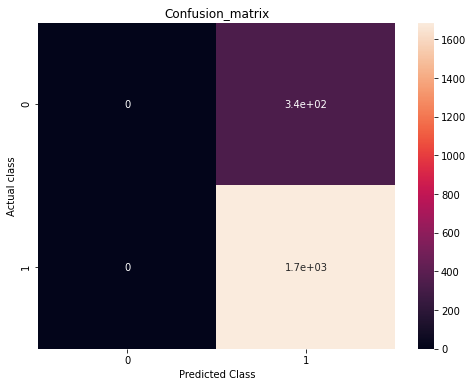

Confusion matrix: 
 [[   0  339]
 [   0 1687]]
TP:  1687
TN:  0
FP:  339
FN:  0
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       339
           1       0.83      1.00      0.91      1687

    accuracy                           0.83      2026
   macro avg       0.42      0.50      0.45      2026
weighted avg       0.69      0.83      0.76      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-pack

Training Accuracy_Score: 66.67100977198697 %
Training Precision: 66.67100977198697 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 100.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 80.00312695434646 %
Validation Accuracy_Score: 83.26752221125369 %
Validation Precision: 83.26752221125369 %
Validation Recall: 100.0 %
Validation F1 Score: 90.869916509561 %


In [68]:

plotconfusionMatrix(bestNN2,y_valid['Attrition_Flag'],scaled_XValid)

getMetrics(bestNN2,scaled_XKmeans,y_train_res['Attrition_Flag'],scaled_XValid,y_valid['Attrition_Flag'])

In [37]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN=create_modelWithDropBatch(hidden_layers= 6, learning_rate= 0.05)
history2 = bestNN.fit(
     pca_finalDF, y_train_res,
    validation_data=(pcavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  


NameError: name 'pca_finalDF' is not defined

In [51]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')

<AxesSubplot:title={'center':'Accuracy'}>

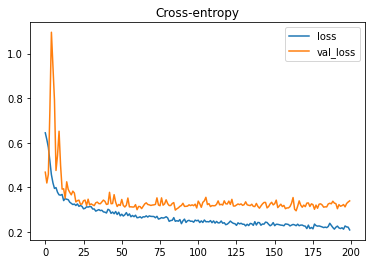

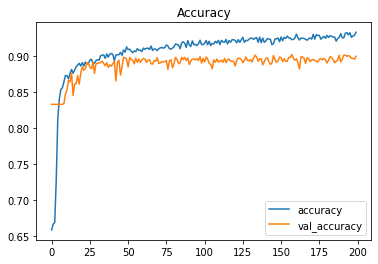

In [26]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [36]:
# scaled_x_test

In [34]:
y_pred_SVM = bestNN2.predict_classes(pca_finalDF)


# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_train_res, y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_train_res, y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_train_res, y_pred_SVM)*100,'%')

NameError: name 'bestNN2' is not defined

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


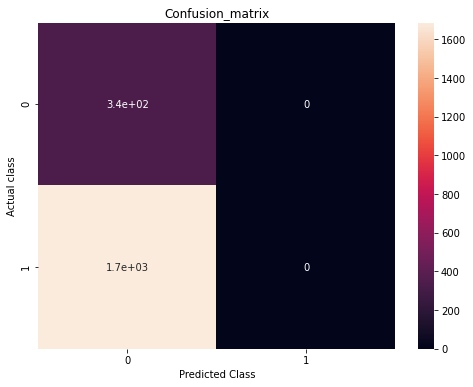

Confusion matrix: 
 [[ 339    0]
 [1687    0]]
TP:  0
TN:  339
FP:  0
FN:  1687
Classification report: 
               precision    recall  f1-score   support

           0       0.17      1.00      0.29       339
           1       0.00      0.00      0.00      1687

    accuracy                           0.17      2026
   macro avg       0.08      0.50      0.14      2026
weighted avg       0.03      0.17      0.05      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-pack

Training Accuracy_Score: 33.328990228013026 %
Training Precision: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/pytho

Training Recall: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 0.0 %
Validation Accuracy_Score: 16.732477788746298 %
Validation Precision: 0.0 %
Validation Recall: 0.0 %
Validation F1 Score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:

plotconfusionMatrix(bestNN,y_valid['Attrition_Flag'],pcavalidData)

getMetrics(bestNN,pca_finalDF,y_train_res['Attrition_Flag'],pcavalidData,y_valid['Attrition_Flag'])